# Exploratory Data Analysis and Feature Transformation/Creation

In [6]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score, classification_report

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import GroupShuffleSplit, ShuffleSplit, GridSearchCV, GroupKFold
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, \
AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

#Show all columns
pd.set_option('display.max_columns', None)

#Display plots inline
%matplotlib inline

#Load data and apply basic filters
df = pd.DataFrame.from_csv('predata.csv').reset_index(drop=True)
df.head()
df = df.loc[df['Season'] != 2017]
df['WSTOT'].fillna(0, inplace=True)
# df.rename(columns={'2:00 PM':'2PM', '3:00 PM':'3PM'}, inplace=True)

print "Number of samples:", len(df)
print "Number of features:", len(df.columns)

Number of samples: 4319
Number of features: 87


## Remove Outliers

In [7]:
#Use sorting method to find outliers
df.sort('2P%', ascending=False).head(5)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Url,Season,% shots 2pt J,% shots at rim,%assisted 2pt J,%assisted 3s,%assisted at rim,%of shots 3pt,2P%,2PA,2PM,3P%,3PA,3PAr,3PM,AST,AST%,ATr,A_Score,Age,Agility,Ast/TO,Athleticism,BLK,BLK%,Born,DEF,DRB%,DRtg,DWS,D_Score,Drafted,Drafted_x,Drafted_y,FG%,FG% 2pt Jumpers,FG% at rim,FGA,FGM,FT%,FT/FGA,FTA,FTA/FGA,FTM,FTr,GP,Height,IS_Score,League,MIN,Max_Vert,NS_Vert,Name,OFF,ORB%,ORtg,OS_Score,OWS,PER,PF,PPM,PPR,PPS,PTS,P_Score,Pick,Pick_x,Pick_y,Position,STL,STL%,Speed,TOV,TOV%,TRB,TRB%,TS,TS%,USG%,WS,WSPredict,WSTOT,Weight,eFG,eFG%,PosHeight,Wingspan
1505,http://basketball.realgm.com/player/Francisco-...,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,1.098964,2.862348,3.056149,0.272227,9.546090,0.693407,2.658151,9.195827,44.91,1.906037,11.673089,22.001142,3.33,1.66,D,2.503376,8.24,1981.998858,6.843972,11.59,105.9,0.98,2.690362,2005.0,2005.0,2005.0,0.451251,NaN,NaN,13.951970,6.226918,0.797,0.69,13.150238,NaN,4.627313,0.417381,NaN,201.0,14.633428,Non-NBA,425.00,31.5,27.5,Francisco Garcia,2.227117,3.96,123.7,3.602339,3.76,29.36,8.107098,1.234601,1.27,2.31,26.558156,3.752710,23.0,23.0,23,W,3.425672,4.60,10.63,4.826861,23.00,8.977757,7.83,0.777348,0.869,26.53,NaN,3.545000,18.133939,88.0,0.558589,0.633,197.235161,82.75
324,http://basketball.realgm.com/player/Eric-Mayno...,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,0.915174,5.902025,4.882618,0.000000,0.000000,0.000000,0.000000,7.395446,32.79,inf,6.594870,28.555936,3.19,0.00,F,0.000000,0.00,1987.444064,6.984262,19.05,102.6,0.01,1.726675,2009.0,2009.0,2009.0,0.896462,NaN,NaN,6.098756,5.029113,0.000,0.00,0.000000,NaN,0.000000,0.000000,NaN,191.0,10.436432,Non-NBA,3.15,31.5,28.5,Eric Maynor,0.000000,0.00,214.5,1.820135,0.03,19.71,0.000000,1.879384,11.13,2.00,9.351340,3.848154,20.0,20.0,20,G,0.000000,0.00,10.78,0.000000,0.00,6.817064,10.58,0.895690,1.000,7.81,NaN,1.590000,3.019697,79.0,0.904114,1.000,186.796486,74.50
239,http://basketball.realgm.com/player/Dawan-Robi...,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,0.892908,48.773039,42.311189,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,NaN,NaN,22.892009,NaN,0.00,NaN,0.000000,0.00,1982.107991,47.376063,131.15,67.6,0.00,NaN,2006.0,NaN,NaN,0.897119,NaN,NaN,46.591257,41.380441,0.000,0.00,0.000000,NaN,0.000000,0.000000,NaN,188.0,NaN,Non-NBA,0.50,NaN,NaN,Dawan Robinson,0.000000,0.00,200.0,NaN,0.03,122.18,0.000000,1.579150,0.00,2.00,76.734747,NaN,NaN,NaN,NaN,G,0.000000,0.00,NaN,0.000000,0.00,46.610080,52.63,0.877795,1.000,49.78,NaN,0.000000,0.000000,88.0,0.882215,1.000,186.796486,76.50
3765,http://basketball.realgm.com/player/Dragan-Ben...,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,0.795192,6.494404,4.727819,0.000000,5.561345,0.438264,0.000000,0.000000,0.00,NaN,NaN,15.122831,3.54,0.00,NaN,0.000000,0.00,1997.877169,7.303345,24.24,115.6,0.00,NaN,2016.0,2016.0,2016.0,0.401246,NaN,NaN,13.030708,4.778012,0.000,0.50,9.458671,NaN,0.000000,0.275059,NaN,216.0,NaN,Non-NBA,3.00,26.5,24.0,Dragan Bender,0.000000,0.00,77.7,NaN,-0.02,4.31,9.230606,1.762052,0.00,1.00,8.981505,NaN,4.0,4.0,4,B,0.000000,0.00,12.05,0.000000,0.00,7.396530,12.70,0.337086,0.410,21.14,NaN,2.941316,-0.244255,102.0,0.408625,0.500,211.015428,86.00
2821,http://basketball.realgm.com/player/Eric-Boate...,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,0.765350,5.863514,4.360001,0.000000,0.000000,0.000000,0.000000,0.801164,3.44,0.229888,NaN,20.114612,NaN,0.20,NaN,0.000000,0.00,1985.885388,9.763832,21.58,89.0,0.13,NaN,2010.0,NaN,NaN,0.768831,NaN,NaN,5.601219,4.264091,1.000,0.29,2.175137,NaN,0.960215,0.171964,NaN,203.0,NaN,Non-NBA,25.50,NaN,NaN,Eric Boateng,3.177278,8.08,110.7,NaN,0.07,12.40,13.218114,1.802907,-8.04,2.00,9.225082,NaN,NaN,NaN,NaN,S,0.751873,1.11,NaN,3.486662,38.61,12.807959,15.23,0.779767,0.881,12.62,NaN,0.000000,0.000000,116.0,0.756184,0.857,204.547820,86.25


In [8]:
df.sort('3P%', ascending=False).head(6)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Url,Season,% shots 2pt J,% shots at rim,%assisted 2pt J,%assisted 3s,%assisted at rim,%of shots 3pt,2P%,2PA,2PM,3P%,3PA,3PAr,3PM,AST,AST%,ATr,A_Score,Age,Agility,Ast/TO,Athleticism,BLK,BLK%,Born,DEF,DRB%,DRtg,DWS,D_Score,Drafted,Drafted_x,Drafted_y,FG%,FG% 2pt Jumpers,FG% at rim,FGA,FGM,FT%,FT/FGA,FTA,FTA/FGA,FTM,FTr,GP,Height,IS_Score,League,MIN,Max_Vert,NS_Vert,Name,OFF,ORB%,ORtg,OS_Score,OWS,PER,PF,PPM,PPR,PPS,PTS,P_Score,Pick,Pick_x,Pick_y,Position,STL,STL%,Speed,TOV,TOV%,TRB,TRB%,TS,TS%,USG%,WS,WSPredict,WSTOT,Weight,eFG,eFG%,PosHeight,Wingspan
4166,http://basketball.realgm.com/player/Pape-Sow/S...,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,0.404222,13.222008,5.192612,1.047028,0.871495,0.064682,0.933352,1.110812,5.40,0.332061,5.568250,21.109132,3.270,0.29,F,1.042470,3.12,1981.890868,9.458915,29.63,101.5,0.73,1.217508,2004.0,2004.0,2004.0,0.459325,NaN,NaN,13.654641,6.215339,0.681,0.72,13.455206,NaN,4.045211,0.436359,NaN,208.0,6.030657,Non-NBA,283.0,31.50,28.00,Pape Sow,4.235854,11.80,113.8,0.661525,1.72,23.52,8.074081,1.523180,-7.18,1.56,17.499163,1.264654,47.0,47.0,47,B,2.004751,2.99,12.130,3.346787,17.30,13.574781,20.09,0.517843,0.579,24.52,NaN,0.310000,0.72000,102.0,0.493489,0.559,211.015428,86.00
3559,http://basketball.realgm.com/player/Alex-Steph...,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,0.532518,10.516553,5.090293,0.883329,0.073079,0.007212,0.060562,1.649011,7.04,0.581176,NaN,24.400228,3.480,0.36,F,1.431982,4.31,1987.599772,8.444386,26.16,98.8,1.00,NaN,2011.0,2011.0,2011.0,0.540643,NaN,NaN,10.650999,5.274507,0.535,0.76,11.317928,NaN,2.029747,0.456066,NaN,208.0,NaN,Non-NBA,246.0,NaN,33.50,Alex Stepheson,5.106087,16.85,110.6,NaN,1.29,23.43,4.620725,1.777883,-7.03,1.66,13.130204,NaN,NaN,NaN,Alex Stepheson,B,0.636437,0.95,12.860,2.840852,20.22,13.653821,21.47,0.542613,0.622,22.22,NaN,0.090000,0.09000,113.0,0.549390,0.627,211.015428,84.00
3790,http://basketball.realgm.com/player/Ekpe-Udoh/...,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,0.713452,11.238670,7.305704,0.858787,0.923625,0.078069,0.754475,3.686786,15.31,4.090312,9.381392,24.614612,3.290,3.00,D,4.056278,9.83,1987.385388,13.784817,32.43,106.8,0.06,2.698691,2010.0,2010.0,2010.0,0.721253,NaN,NaN,12.355418,8.242568,1.000,0.08,1.417912,NaN,0.482333,0.049561,NaN,208.0,10.969365,Non-NBA,18.5,33.50,31.00,Ekpe Udoh,4.363749,13.51,170.5,1.373890,0.34,35.95,6.351697,1.906114,2.75,1.83,16.908614,2.927777,6.0,6.0,6,B,0.000000,0.00,11.150,0.894143,7.44,17.886532,24.02,0.769001,0.884,18.23,NaN,2.798485,6.81697,111.0,0.759876,0.875,211.015428,88.50
3061,http://basketball.realgm.com/player/Kadeem-Bat...,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,0.406368,13.807895,5.112447,0.858787,0.121189,0.009008,0.098995,0.322496,1.36,0.097388,NaN,24.486301,3.485,0.07,NaN,0.266113,0.71,1991.513699,4.973953,13.90,112.4,0.30,NaN,2014.0,NaN,NaN,0.407816,NaN,NaN,14.050040,5.299399,0.743,0.34,6.511566,NaN,1.645462,0.200152,NaN,206.0,NaN,Non-NBA,142.3,34.00,24.75,Kadeem Batts,2.433418,7.23,90.4,NaN,-0.55,8.64,8.834127,1.888633,-8.95,1.20,12.605595,NaN,NaN,NaN,NaN,S,1.064451,1.52,11.845,3.284981,19.00,7.334055,10.58,0.455230,0.523,24.52,NaN,0.000000,0.00000,111.0,0.413339,0.476,204.547820,86.00
2806,http://basketball.realgm.com/player/Drew-Gordo...,2012.0,47.3%,52.2%,61.8%,100.0%,66.4%,0.6%,0.481394,14.742624,6.895155,0.837622,0.069476,0.004971,0.059526,1.757461,8.88,0.602756,NaN,21.469863,3.445,0.52,F,1.342482,3.76,1990.530137,11.622321,28.68,81.6,3.19,NaN,2012.0,2012.0,2012.0,0.486239,33.5%,72.4%,14.164778,6.815988,0.752,0.39,7.601038,39.8%,2.522733,0.237628,NaN,206.0,NaN,Non-NBA,539.0,34.25,28.25,Drew Gordon,4.376377,12.31,111.9,NaN,3.16,23.71,4.781533,1.671972,-5.07,1.39,16.168995,NaN,NaN,NaN,Drew Gordon,S,1.457552,2.12,11.745,2.917087,16.60,15.844825,20.93,0.518341,0.584,23.67,NaN,-0.160000,-0.16000,111.0,0.480515,0.545,204.547820,83.75
2551,http://basketball.realgm.com/player/Brandon-As...,2013.0,61.0%,37.3%,65.1%,66.7%,51.1%,1.7%,0.461849,11.069908,4.967212,0.837622,0.155154,0.014617,0.132934,1.460386,6.72,0.510863,NaN,18.461644,3.580,

In [9]:
# TS shows negative rates for two players and 3PAr's higher than 1
# Index 1124 also identified as absurd
df.sort('TS', ascending=False).head(10)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Url,Season,% shots 2pt J,% shots at rim,%assisted 2pt J,%assisted 3s,%assisted at rim,%of shots 3pt,2P%,2PA,2PM,3P%,3PA,3PAr,3PM,AST,AST%,ATr,A_Score,Age,Agility,Ast/TO,Athleticism,BLK,BLK%,Born,DEF,DRB%,DRtg,DWS,D_Score,Drafted,Drafted_x,Drafted_y,FG%,FG% 2pt Jumpers,FG% at rim,FGA,FGM,FT%,FT/FGA,FTA,FTA/FGA,FTM,FTr,GP,Height,IS_Score,League,MIN,Max_Vert,NS_Vert,Name,OFF,ORB%,ORtg,OS_Score,OWS,PER,PF,PPM,PPR,PPS,PTS,P_Score,Pick,Pick_x,Pick_y,Position,STL,STL%,Speed,TOV,TOV%,TRB,TRB%,TS,TS%,USG%,WS,WSPredict,WSTOT,Weight,eFG,eFG%,PosHeight,Wingspan
4268,http://basketball.realgm.com/player/Steve-Nova...,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,0.442358,-7.273282,-3.125886,0.360178,11.228507,1.821653,4.136304,2.489030,11.12,1.018824,5.796686,20.550457,3.37,0.89,F,0.179684,0.84,1983.449543,7.064958,13.74,135.4,-1.58,1.874114,2006.0,2006.0,2006.0,0.320272,NaN,NaN,6.246757,1.981469,0.912,0.69,5.891278,NaN,2.371232,0.417627,NaN,208.0,9.293558,Non-NBA,458.00,31.0,24.5,Steve Novak,2.151385,4.40,113.7,3.969072,1.22,17.74,5.743440,1.260097,-2.73,3.95,20.314080,3.590488,32.0,32.0,32,S,1.377579,2.20,11.11,2.444199,25.24,9.118849,9.13,1.327809,1.485,12.14,NaN,4.341818,14.881296,102.0,0.715675,0.811,211.015428,81.50
2342,http://basketball.realgm.com/player/Tony-Bobbi...,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,0.141731,-5.186539,-0.714188,0.340912,13.987211,1.234567,4.873877,4.724436,20.38,1.970473,NaN,24.192466,NaN,1.71,F,0.221688,0.97,1979.807534,7.596960,15.01,111.7,0.42,NaN,2004.0,2004.0,2004.0,0.461119,NaN,NaN,11.481922,5.238581,0.843,0.35,5.451349,NaN,2.029009,0.210244,NaN,193.0,NaN,Non-NBA,358.50,NaN,NaN,Tony Bobbitt,1.014882,2.04,125.7,NaN,1.92,26.41,11.219606,1.304809,0.89,2.93,27.718079,NaN,NaN,NaN,Tony Bobbitt,G,3.547015,5.18,NaN,2.398750,17.05,8.496908,8.50,1.115223,1.257,17.64,NaN,0.010000,0.010000,93.0,0.710002,0.805,197.235161,79.00
324,http://basketball.realgm.com/player/Eric-Mayno...,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,0.915174,5.902025,4.882618,0.000000,0.000000,0.000000,0.000000,7.395446,32.79,inf,6.594870,28.555936,3.19,0.00,F,0.000000,0.00,1987.444064,6.984262,19.05,102.6,0.01,1.726675,2009.0,2009.0,2009.0,0.896462,NaN,NaN,6.098756,5.029113,0.000,0.00,0.000000,NaN,0.000000,0.000000,NaN,191.0,10.436432,Non-NBA,3.15,31.5,28.5,Eric Maynor,0.000000,0.00,214.5,1.820135,0.03,19.71,0.000000,1.879384,11.13,2.00,9.351340,3.848154,20.0,20.0,20,G,0.000000,0.00,10.78,0.000000,0.00,6.817064,10.58,0.895690,1.000,7.81,NaN,1.590000,3.019697,79.0,0.904114,1.000,186.796486,74.50
239,http://basketball.realgm.com/player/Dawan-Robi...,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,0.892908,48.773039,42.311189,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,NaN,NaN,22.892009,NaN,0.00,NaN,0.000000,0.00,1982.107991,47.376063,131.15,67.6,0.00,NaN,2006.0,NaN,NaN,0.897119,NaN,NaN,46.591257,41.380441,0.000,0.00,0.000000,NaN,0.000000,0.000000,NaN,188.0,NaN,Non-NBA,0.50,NaN,NaN,Dawan Robinson,0.000000,0.00,200.0,NaN,0.03,122.18,0.000000,1.579150,0.00,2.00,76.734747,NaN,NaN,NaN,NaN,G,0.000000,0.00,NaN,0.000000,0.00,46.610080,52.63,0.877795,1.000,49.78,NaN,0.000000,0.000000,88.0,0.882215,1.000,186.796486,76.50
843,http://basketball.realgm.com/player/Travis-Die...,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,0.105048,1.960525,0.200092,0.375255,9.421875,0.737649,3.614553,10.313280,53.09,2.904672,6.219515,21.833333,3.26,2.53,F,0.000000,0.00,1982.166667,4.256830,8.28,136.2,-1.92,1.459611,2005.0,2005.0,2005.0,0.358848,NaN,NaN,12.944522,4.598717,0.883,0.66,11.529513,NaN,4.494805,0.394420,NaN,185.0,10.290181,Non-NBA,530.00,31.0,24.5,Travis Diener,1.148281,2.35,135.8,2.908077,6.08,27.04,6.286719,1.260097,6.63,2.49,26.490409,4.131916,38.0,38.0,38,G,2.122082,3.38,10.85,3.552264,19.36,5.345217,5.35,0.846599,0.948,23.00,NaN,2.090000,5.310000,79.0,0.521821,0.591,186.796486,71.75
2821,http://basketball.realgm.com/player/Eric-Boate...,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,0.765350,5.863514,4.360001,0.000000,0.000000,0.000000,0.000000,0.801164,3.44,0.229888,NaN,20.114612,NaN,0.20,NaN,0.000000,0.00,1985.885388,9.763832,21.58

In [10]:
# Drop low quality data
df.drop([1505, 4166, 4268, 2342, 239, 324], inplace=True)

In [11]:
# Max out 3P% at 75%
list3p = list(df['3P%'])
list3p_fixed = []
for item in list3p:
    if item >= 0.75:
        list3p_fixed.append(np.mean(list3p))
    else:
        list3p_fixed.append(item)
df['3P%'] = list3p_fixed

In [12]:
df.sort('Agility', ascending=True).head(8)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Url,Season,% shots 2pt J,% shots at rim,%assisted 2pt J,%assisted 3s,%assisted at rim,%of shots 3pt,2P%,2PA,2PM,3P%,3PA,3PAr,3PM,AST,AST%,ATr,A_Score,Age,Agility,Ast/TO,Athleticism,BLK,BLK%,Born,DEF,DRB%,DRtg,DWS,D_Score,Drafted,Drafted_x,Drafted_y,FG%,FG% 2pt Jumpers,FG% at rim,FGA,FGM,FT%,FT/FGA,FTA,FTA/FGA,FTM,FTr,GP,Height,IS_Score,League,MIN,Max_Vert,NS_Vert,Name,OFF,ORB%,ORtg,OS_Score,OWS,PER,PF,PPM,PPR,PPS,PTS,P_Score,Pick,Pick_x,Pick_y,Position,STL,STL%,Speed,TOV,TOV%,TRB,TRB%,TS,TS%,USG%,WS,WSPredict,WSTOT,Weight,eFG,eFG%,PosHeight,Wingspan
1306,http://basketball.realgm.com/player/DeAndre-Li...,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,0.399459,6.020442,2.336518,0.196841,3.284223,0.346328,0.662086,6.970505,29.580000,1.429036,1.854618,20.751142,0.000,1.240000,D,0.995468,2.660000,1988.248858,5.540212,13.670000,93.500000,1.170000,0.508272,2011.0,2011.0,2011.0,0.324757,NaN,NaN,9.610436,3.091633,0.673000,0.410000,5.348288,NaN,1.589136,0.246437,NaN,198.0,1.810825,Non-NBA,274.0,31.166667,28.00,DeAndre Liggins,0.450714,1.400000,83.200000,0.265133,-0.360000,9.480000,6.136566,1.774222,-2.180000,1.090000,8.661873,0.590109,53.0,53.0,53,W,1.706517,2.490000,5.83,4.880074,32.790000,5.904857,8.160000,0.407037,0.458000,20.270000,NaN,0.560426,1.10873,95.0,0.361222,0.409000,197.235161,83.50
1307,http://basketball.realgm.com/player/DeAndre-Li...,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,0.467714,4.122350,1.873241,0.266364,3.510718,0.441241,0.957066,2.253037,8.800000,1.622742,1.854618,21.751142,0.000,1.410000,D,0.704807,1.770000,1988.248858,4.576315,10.920000,93.500000,0.960000,0.508272,2011.0,2011.0,2011.0,0.375893,NaN,NaN,8.063407,2.997874,0.590000,0.450000,4.970005,NaN,1.293903,0.272943,NaN,198.0,1.810825,Non-NBA,222.5,31.166667,28.00,DeAndre Liggins,1.675341,4.550000,112.200000,0.265133,0.640000,12.140000,5.913733,1.763388,-0.220000,1.270000,8.415972,0.590109,53.0,53.0,53,W,1.762017,2.560000,5.83,1.389071,13.990000,6.190696,7.910000,0.463744,0.521000,13.010000,NaN,0.560426,1.10873,95.0,0.441108,0.500000,197.235161,83.50
1308,http://basketball.realgm.com/player/DeAndre-Li...,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,0.394541,6.629958,2.541390,0.327510,2.882822,0.300542,0.966503,3.539282,14.180000,2.006299,1.854618,22.751142,0.000,1.750000,D,0.968780,2.310000,1988.248858,4.904929,12.050000,95.600000,2.390000,0.508272,2011.0,2011.0,2011.0,0.380379,NaN,NaN,9.720998,3.662820,0.648000,0.400000,5.254946,NaN,1.502345,0.239382,NaN,198.0,1.810825,Non-NBA,600.5,31.166667,28.00,DeAndre Liggins,0.804156,2.130000,108.600000,0.265133,1.760000,13.580000,5.197890,1.663711,0.750000,1.240000,9.945770,0.590109,53.0,53.0,53,W,1.591566,2.290000,5.83,1.764919,14.910000,5.636036,7.210000,0.464083,0.523000,15.820000,NaN,0.560426,1.10873,95.0,0.434424,0.492000,197.235161,83.50
1309,http://basketball.realgm.com/player/DeAndre-Li...,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,0.152032,1.462748,0.586534,0.090637,1.069718,0.133781,0.278883,2.038422,21.637049,1.049750,1.854618,26.751142,0.000,2.245444,D,0.197569,1.575376,1988.248858,1.935313,16.827096,107.645108,0.431096,0.508272,2011.0,2011.0,2011.0,0.127224,NaN,NaN,2.646909,0.896483,0.202058,0.229509,0.782595,NaN,0.159415,0.046356,NaN,198.0,1.810825,Non-NBA,1330.8,31.166667,28.00,DeAndre Liggins,0.237113,2.128359,101.578291,0.265133,-0.045126,11.191923,1.799141,1.839963,2.415194,1.148161,2.204410,0.590109,53.0,53.0,53,W,0.762464,3.098729,5.83,0.675901,21.654425,2.119373,9.651846,0.151761,0.520314,13.767450,NaN,0.560426,1.10873,95.0,0.147965,0.504055,197.235161,83.50
728,http://basketball.realgm.com/player/Rodrigue-B...,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,0.348799,7.258808,2.306868,0.245613,5.011010,0.405639,1.169517,4.286184,16.020000,1.187510,9.034732,25.853653,1.575,0.870000,D,0.130993,0.330000,1988.146347,4.303266,11.880000,106.500000,0.420000,2.594408,2009.0,2009.0,2009.0,0.303913,NaN,NaN,12.901147,3.620111,0.818000,0.340000,6.044268,NaN,1.682251,0.202333,NaN,185.0,11.055461,Non-NBA,145.5,19.500000,14.75,Rodrigue Beaubois,1.268302,3.930000,91.500000,2.181431

In [13]:
#Set minimum agility as 2.7

fixed_agility = []
for item in list(df['Agility']):
    if item <= 2.7:
        fixed_agility.append(np.nan)
    else:
        fixed_agility.append(item)
df['Agility'] = fixed_agility

In [14]:
df.sort('Speed', ascending=True).head()

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Url,Season,% shots 2pt J,% shots at rim,%assisted 2pt J,%assisted 3s,%assisted at rim,%of shots 3pt,2P%,2PA,2PM,3P%,3PA,3PAr,3PM,AST,AST%,ATr,A_Score,Age,Agility,Ast/TO,Athleticism,BLK,BLK%,Born,DEF,DRB%,DRtg,DWS,D_Score,Drafted,Drafted_x,Drafted_y,FG%,FG% 2pt Jumpers,FG% at rim,FGA,FGM,FT%,FT/FGA,FTA,FTA/FGA,FTM,FTr,GP,Height,IS_Score,League,MIN,Max_Vert,NS_Vert,Name,OFF,ORB%,ORtg,OS_Score,OWS,PER,PF,PPM,PPR,PPS,PTS,P_Score,Pick,Pick_x,Pick_y,Position,STL,STL%,Speed,TOV,TOV%,TRB,TRB%,TS,TS%,USG%,WS,WSPredict,WSTOT,Weight,eFG,eFG%,PosHeight,Wingspan
728,http://basketball.realgm.com/player/Rodrigue-B...,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,0.348799,7.258808,2.306868,0.245613,5.011010,0.405639,1.169517,4.286184,16.020000,1.187510,9.034732,25.853653,NaN,0.870000,D,0.130993,0.330000,1988.146347,4.303266,11.880000,106.500000,0.420000,2.594408,2009.0,2009.0,2009.0,0.303913,NaN,NaN,12.901147,3.620111,0.818000,0.340000,6.044268,NaN,1.682251,0.202333,NaN,185.0,11.055461,Non-NBA,145.5,19.500000,14.75,Rodrigue Beaubois,1.268302,3.930000,91.500000,2.181431,-0.380000,7.850000,7.056163,1.876192,-4.420000,1.100000,10.623057,3.328439,25.0,25.0,25,G,0.916951,1.330000,0.00,3.580543,21.750000,5.487445,8.030000,0.417211,0.480000,23.250000,NaN,2.163485,4.92697,83.0,0.358115,0.412000,186.796486,82.25
729,http://basketball.realgm.com/player/Rodrigue-B...,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,0.292604,5.623707,2.568160,0.170226,3.679201,0.227067,1.023588,3.010558,21.870807,1.361945,9.034732,26.853653,NaN,1.839713,D,0.146278,0.723010,1988.146347,2.237827,10.995493,108.081458,0.770116,2.594408,2009.0,2009.0,2009.0,0.240475,NaN,NaN,9.775086,3.736784,0.516270,0.215780,3.252498,NaN,1.085345,0.092948,NaN,185.0,11.055461,Non-NBA,1289.0,19.500000,14.75,Rodrigue Beaubois,0.436572,2.095780,118.115593,2.181431,2.611319,21.341202,2.824200,1.732108,1.348619,1.291676,9.687224,3.328439,25.0,25.0,25,G,1.244873,2.910636,0.00,1.280345,11.823119,2.630449,6.542545,0.300355,0.588925,25.302296,NaN,2.163485,4.92697,83.0,0.277711,0.550295,186.796486,82.25
730,http://basketball.realgm.com/player/Rodrigue-B...,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,0.253944,4.190188,2.026443,0.202224,3.480872,0.213460,1.395796,1.721243,15.321509,0.830772,9.034732,27.853653,NaN,1.272014,D,0.178928,1.098044,1988.146347,1.414167,8.073489,109.417432,0.989687,2.594408,2009.0,2009.0,2009.0,0.228119,NaN,NaN,8.109558,3.581698,0.426872,0.160215,1.971200,NaN,0.663556,0.056723,NaN,185.0,11.055461,Non-NBA,2562.6,19.500000,14.75,Rodrigue Beaubois,0.335937,2.099046,118.893128,2.181431,3.293146,20.812638,2.138787,1.787872,-0.979358,1.390033,9.185043,3.328439,25.0,25.0,25,G,0.696742,2.100220,0.00,0.980022,12.177742,1.719362,5.142803,0.288800,0.648008,25.440604,NaN,2.163485,4.92697,83.0,0.278086,0.623218,186.796486,82.25
1308,http://basketball.realgm.com/player/DeAndre-Li...,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,0.394541,6.629958,2.541390,0.327510,2.882822,0.300542,0.966503,3.539282,14.180000,2.006299,1.854618,22.751142,NaN,1.750000,D,0.968780,2.310000,1988.248858,4.904929,12.050000,95.600000,2.390000,0.508272,2011.0,2011.0,2011.0,0.380379,NaN,NaN,9.720998,3.662820,0.648000,0.400000,5.254946,NaN,1.502345,0.239382,NaN,198.0,1.810825,Non-NBA,600.5,31.166667,28.00,DeAndre Liggins,0.804156,2.130000,108.600000,0.265133,1.760000,13.580000,5.197890,1.663711,0.750000,1.240000,9.945770,0.590109,53.0,53.0,53,W,1.591566,2.290000,5.83,1.764919,14.910000,5.636036,7.210000,0.464083,0.523000,15.820000,NaN,0.560426,1.10873,95.0,0.434424,0.492000,197.235161,83.50
1307,http://basketball.realgm.com/player/DeAndre-Li...,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,0.467714,4.122350,1.873241,0.266364,3.510718,0.441241,0.957066,2.253037,8.800000,1.622742,1.854618,21.751142,NaN,1.410000,D,0.704807,1.770000,1988.248858,4.576315,10.920000,93.500000,0.960000,0.508272,2011.0,2011.0,2011.0,0.375893,NaN,NaN,8.063407,2.997874,0.590000,0.450000,4.970005,NaN,1.293903,0.272943,NaN,198.0,1.810825,Non-NBA,222.5,31.166667,28.00,DeAndre Liggins,1.675341,4.550000,112.200000,0.265133,0.6

In [15]:
#Set minimum speed at 9
fixed_speed = []
for item in list(df['Speed']):
    if item <= 9:
        fixed_speed.append(np.nan)
    else:
        fixed_speed.append(item)
df['Speed'] = fixed_speed

In [16]:
#Replace any infinities with nan, athletic zeros with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['Max_Vert'].replace(0, np.nan, inplace=True)
df['NS_Vert'].replace(0, np.nan, inplace=True)
df['Speed'].replace(0, np.nan, inplace=True)
df['Agility'].replace(0, np.nan, inplace=True)

## Create Features

In [17]:
df['Wingspan'] *= 2.54
df['HtPosHt'] = df['Height']/df['PosHeight']
df['WHr'] = df['Wingspan']/df['Height']
df['WtHr'] = df['Weight']/df['Height']
df['Stocks'] = df['STL'] + df['BLK']
df['Stocks2'] = df['STL']*df['BLK']
df['RSB'] = df['TRB'] + df['STL'] + df['BLK']
df['RSB2'] = df['TRB']*df['STL']*df['BLK']

In [18]:
# Make columns numeric
df.replace('%', '', regex=True, inplace=True)
dfa = df.apply(pd.to_numeric, errors='coerce')
dfa['Name'] = df['Name']
dfa['Url'] = df['Url']

In [19]:
# Create more features
dfb = dfa.loc[dfa['% shots 2pt J'].notnull()].reset_index(drop=True)
dfb['%assisted 2pt J'] /= 100
dfb['%assisted 3s'] /= 100
dfb['%assisted at rim'] /= 100
dfb['% shots 2pt J'] /= 100
dfb['% shots at rim'] /= 100
dfb['%of shots 3pt'] /= 100
dfb['FG% 2pt Jumpers'] /= 100
dfb['FG% at rim'] /= 100
dfb['2ptJ'] = dfb['FGA']*(dfb['% shots 2pt J'])*(dfb['FG% 2pt Jumpers'])
dfb['FGatRim'] = dfb['FGA']*(dfb['% shots at rim'])*(dfb['FG% at rim'])
dfb['RimUnAssisted'] = dfb['FGatRim']*(100 - dfb['%assisted at rim'])
dfb['2ptJUnAssisted'] = dfb['2ptJ']*(100 - dfb['%assisted 2pt J'])
dfb['3ptJUnAssisted'] = dfb['3PA']*(100 - dfb['%assisted 3s'])

dfc = pd.concat([dfb, dfa], ignore_index=True)
df = dfc.groupby(['Name', 'Season']).first().reset_index()
df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Feature Transformation

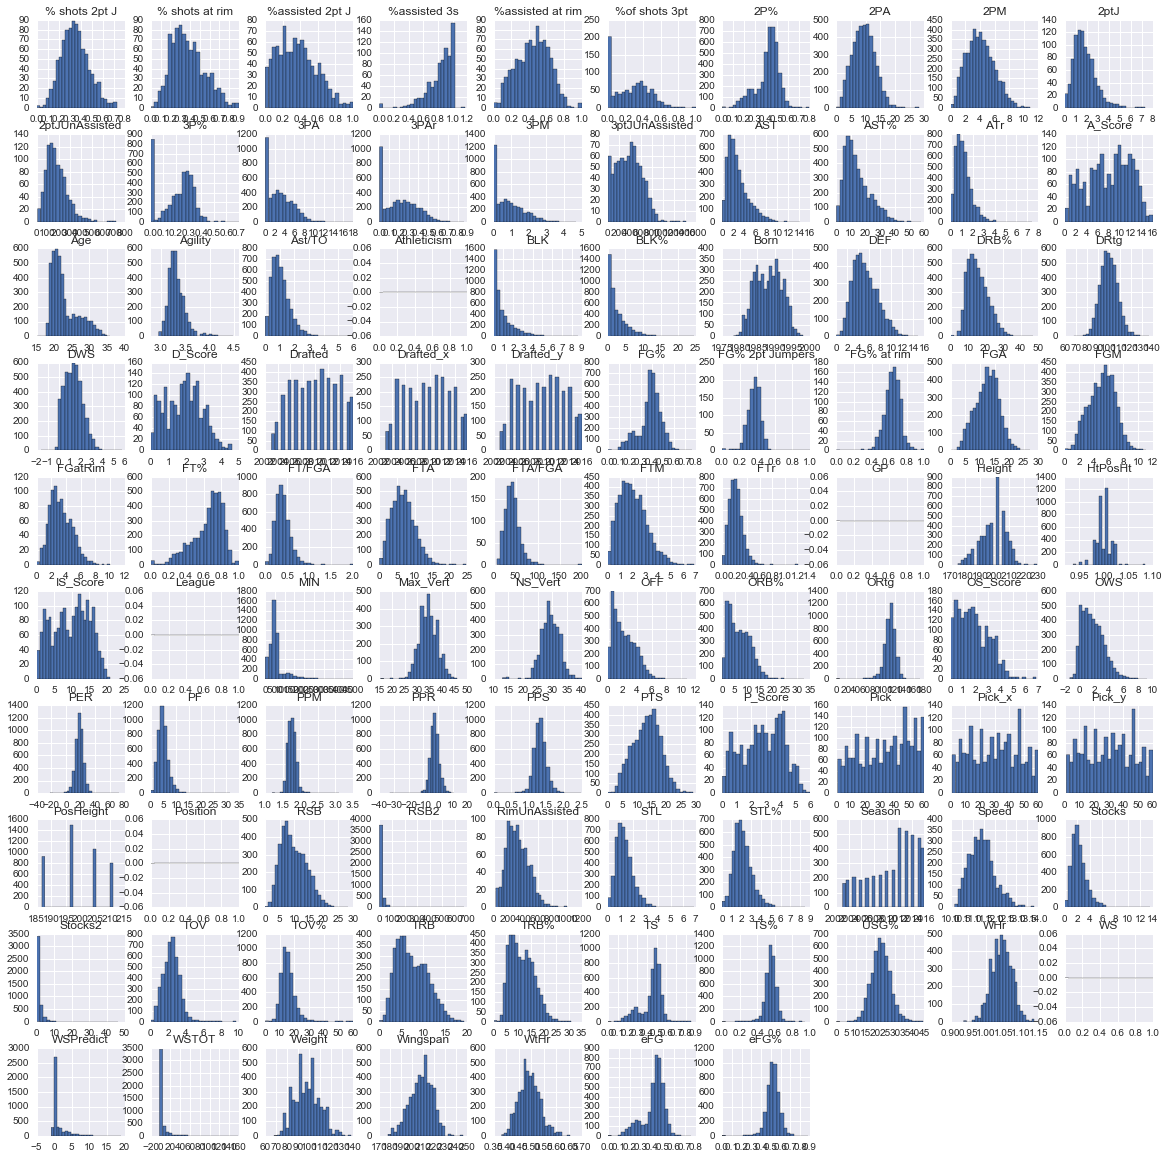

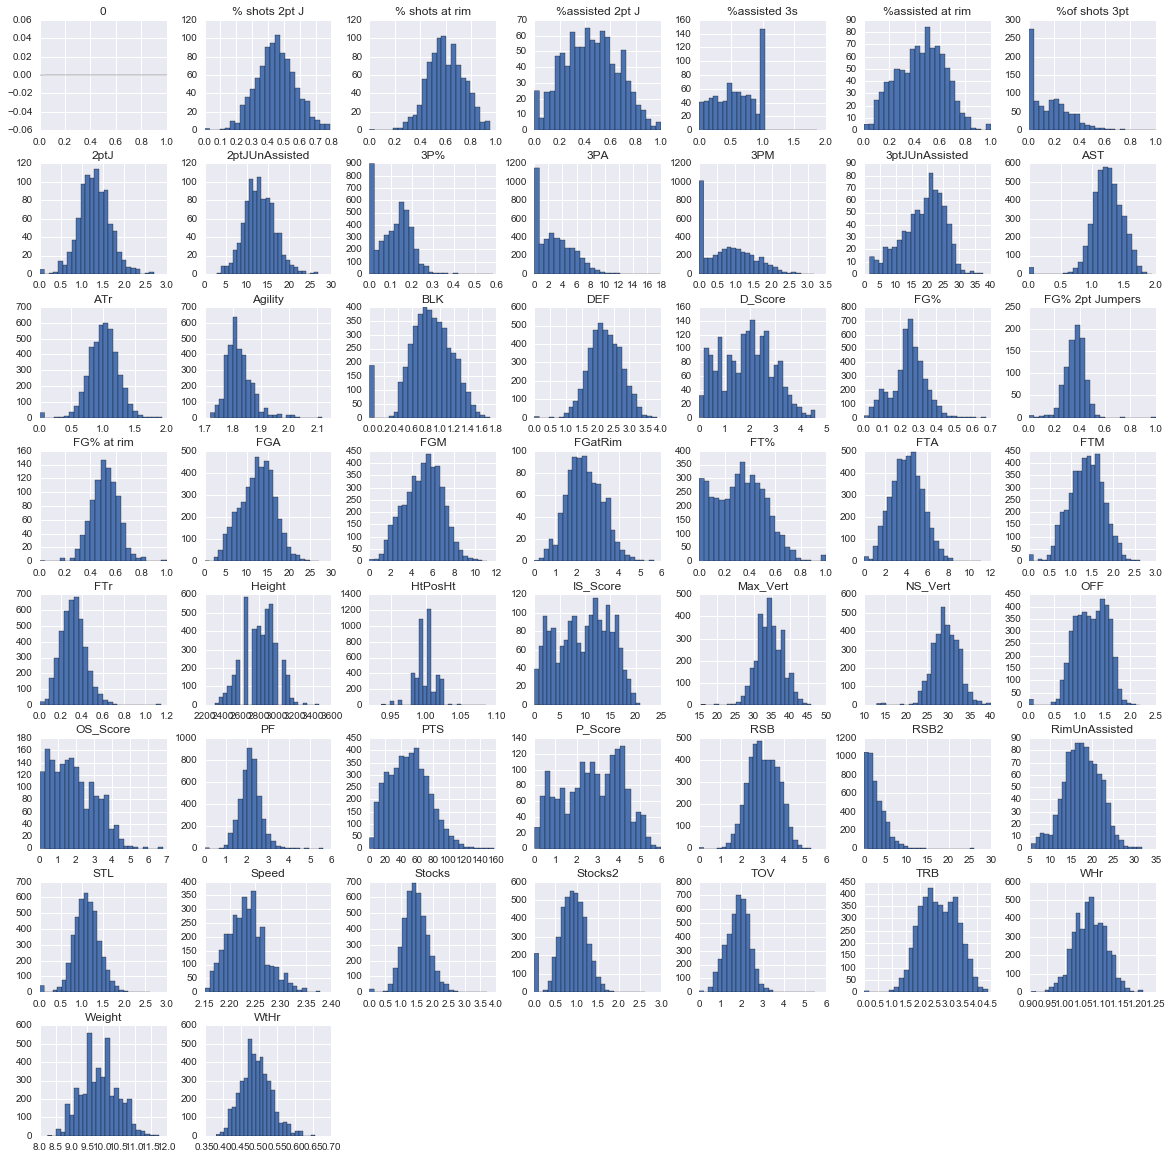

In [35]:
# Classify each feature by skew
none = df[['FG% 2pt Jumpers', 'Max_Vert', 'NS_Vert', 'IS_Score', 'P_Score', 'D_Score', 'OS_Score', \
           '%assisted at rim', '3PA', 'FGA', 'FGM', 'WtHr', 'HtPosHt']]

left_l = df[['FG%', 'FG% at rim', 'Height', 'WHr', '%of shots 3pt', '3P%', 'PTS']]

left = df[[]]

left_s = df[['FT%']]

left_ss = df[['%assisted 3s']]

right_l = df[['3PM', 'FTr', 'FGatRim', 'FTA', '% shots 2pt J', '%assisted 2pt J', 'TOV']]

right = df[['FTM', '% shots at rim', 'PF', 'STL', '2ptJUnAssisted', '3ptJUnAssisted', 'RimUnAssisted', 'TRB', \
            'Weight', 'Agility', 'DEF', '2ptJ', 'Stocks', 'RSB', 'RSB2']]

right_s = df[['OFF', 'ATr', 'Speed']]

right_ss = df[['BLK', 'AST', 'Stocks2']]

log_min = df[['MIN']]

%matplotlib inline
hist = df.hist(figsize=(20, 20), bins=25)

# Feature transformations
one_point_five = lambda x: x**(1.5)
cube = lambda x: x**3
quart = lambda x: x**4
point_seven_five = lambda x: x**(0.75)
point_33 = lambda x: x**(0.33)
point_25 = lambda x: x**(0.25)
lmin = lambda x: np.log(x)

# Apply transformations
left_l2 = left_l.applymap(one_point_five)
left2 = left.applymap(np.square)
left_s2 = left_s.applymap(cube)
left_ss2 = left_ss.applymap(quart)

right_l2 = right_l.applymap(point_seven_five)
right2 = right.applymap(np.sqrt)
right_s2 = right_s.applymap(point_33)
right_ss2 = right_ss.applymap(point_25)

# log_min2 = log_min.applymap(lmin)

df2 = pd.concat([none, left_l2, left2, left_s2, left_ss2, right_l2, right2, right_s2, right_ss2], axis=1)

# Show transformed plot
hist2 = df2.hist(figsize=(20, 20), bins=25)

# Use transformed features where possible
df3 = df2.combine_first(df)

## Athletic Scores

In [36]:
# Locate valid athletic samples

max_vert_fill = df3.loc[df3['Max_Vert'].notnull()]
agility_fill = max_vert_fill.loc[max_vert_fill['Agility'].notnull()]
ns_fill = max_vert_fill.loc[max_vert_fill['NS_Vert'].notnull()]
speed_fill = max_vert_fill.loc[max_vert_fill['Speed'].notnull()]

features = ['Height', 'Weight', 'WHr', 'WtHr', 'STL', 'BLK', 'OFF', 'DEF', 'FTr', 'PTS']

X = agility_fill[features].fillna(np.mean(agility_fill[features]))
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=features)

groups = list(agility_fill['Name'])

y = agility_fill['Agility']
N = float(len(agility_fill))
p = float(len(features))
targets = 1

# GroupKFold to split the data
gkf = GroupKFold(n_splits=10)
for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]  
    
RMSE = make_scorer(mean_squared_error, greater_is_better = False)

# Test how different algorithms predict agility
def RandomForest(X_train, X_test, Y_train, Y_test):
    reg = RandomForestRegressor(max_features=None)
    reg.fit(X_train, Y_train)
    feature_names = sorted([(features[i], reg.feature_importances_[i]) for i in range(len(features))], \
                           key=lambda x: x[1], reverse=True)
    
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Random Forest"
    print "Feature Names and Importance Scores:", feature_names
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE

def NN(X_train, X_test, Y_train, Y_test):
    reg = KNeighborsRegressor(n_neighbors=20, weights='distance')
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Nearest Neighbor"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Linear(X_train, X_test, Y_train, Y_test):
    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Linear Regression"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Gradient(X_train, X_test, Y_train, Y_test):
    reg = GradientBoostingRegressor()
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Gradient Boost"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Bagging(X_train, X_test, Y_train, Y_test):
    reg = BaggingRegressor()
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Bagging"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
Linear(X_train, X_test, Y_train, Y_test)
RandomForest(X_train, X_test, Y_train, Y_test)
NN(X_train, X_test, Y_train, Y_test)
Bagging(X_train, X_test, Y_train, Y_test)
Gradient(X_train, X_test, Y_train, Y_test)

Regressor: Linear Regression
R-Squared: 0.0640519388507
Adj. R-Squared: 0.0609352286903
RMSE: 0.0454051000448

Regressor: Random Forest
Feature Names and Importance Scores: [('WHr', 0.22639188579569497), ('Weight', 0.17398541860232755), ('Height', 0.1554322244249951), ('WtHr', 0.12613055527753575), ('FTr', 0.066250064606436371), ('OFF', 0.05415003098984876), ('STL', 0.053050716780296679), ('BLK', 0.051169620173088792), ('PTS', 0.047991382580440937), ('DEF', 0.045448100769335073)]
R-Squared: -0.205357225385
Adj. R-Squared: -0.209371068959
RMSE: 0.0515272126697
Regressor: Nearest Neighbor
R-Squared: 0.00909374443081
Adj. R-Squared: 0.00579402330004
RMSE: 0.0467191623498

Regressor: Bagging
R-Squared: -0.242788145876
Adj. R-Squared: -0.24692663454
RMSE: 0.0523211539114

Regressor: Gradient Boost
R-Squared: -0.0777019519327
Adj. R-Squared: -0.0812907030214
RMSE: 0.0487223354088



In [37]:
# Use linear regressions to fill missing athletic data

X = max_vert_fill[features].fillna(np.mean(max_vert_fill[features]))
y = max_vert_fill['Max_Vert']

lr = linear_model.LinearRegression()
lr.fit(X, y)

dfM = pd.DataFrame(lr.predict(X))
df3['Max_Vert'] = df3['Max_Vert'].fillna(dfM[0])

In [38]:
X = agility_fill[features].fillna(np.mean(agility_fill[features]))
y = agility_fill['Agility'] 

lr.fit(X, y)

X = max_vert_fill[features].fillna(np.mean(max_vert_fill[features]))

dfA = pd.DataFrame(lr.predict(X))
df3['Agility'] = df3['Agility'].fillna(dfA[0])

In [39]:
X = ns_fill[features].fillna(np.mean(ns_fill[features]))
y = ns_fill['NS_Vert']

lr.fit(X, y)

X = max_vert_fill[features].fillna(np.mean(max_vert_fill[features]))

dfN = pd.DataFrame(lr.predict(X))
df3['NS_Vert'] = df3['NS_Vert'].fillna(dfN[0])

In [40]:
X = speed_fill[features].fillna(np.mean(speed_fill[features]))
y = speed_fill['Speed']

lr.fit(X, y)

X = max_vert_fill[features].fillna(np.mean(max_vert_fill[features]))

dfS = pd.DataFrame(lr.predict(X))
df3['Speed'] = df3['Speed'].fillna(dfS[0])

In [41]:
df4 = df3.set_index(['Name', 'Season']).reset_index()

In [42]:
# Create new features
df4['Vert_adj'] = df4['Max_Vert']*df4['NS_Vert']
df4['Move_adj'] = df4['Speed']*df4['Agility']

In [43]:
OS_data = df4.loc[df4['OS_Score'].notnull()]
feature_cols = list(OS_data[['3PA', '3PM', 'Agility', 'FGM', 'FT%', 'PTS']])
target_cols = list(OS_data[['OS_Score']])
X = OS_data[feature_cols].fillna(np.mean(OS_data[feature_cols]))
y = OS_data[target_cols]
N = float(len(OS_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg = linear_model.LinearRegression()
reg.fit(X, y)
r2 = reg.score(X, y)
adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
print 'R-Squared:', r2
print 'Adj. R-Squared:', adj_r2

X = df4[feature_cols].fillna(np.mean(df4[feature_cols]))
pred = reg.predict(X)
OS_pred = pd.DataFrame(pred)
print len(OS_pred)

OS_data = OS_data.loc[OS_data['% shots at rim'].notnull()]

feature_cols = list(set(OS_data[['3PA', '3PM', 'FGA', 'FT%', 'PTS', '2ptJ', '3ptJUnAssisted', '2ptJUnAssisted', \
                                 'FG% 2pt Jumpers', 'Agility']]))
target_cols = list(OS_data[['OS_Score']])

X = OS_data[feature_cols].fillna(np.mean(OS_data[feature_cols]))
y = OS_data[target_cols]

N = float(len(OS_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg.fit(X, y)
pred = reg.predict(X)
r2 = reg.score(X, y)
adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
print 'R-Squared:', r2
print 'Adj. R-Squared:', adj_r2

OS_pred2 = pd.DataFrame(pred)
print len(OS_pred2)

R-Squared: 0.178077287624
Adj. R-Squared: 0.175254427707
4313
R-Squared: 0.180384386055
Adj. R-Squared: 0.151320002581
293


In [44]:
IS_data = df4.loc[df4['IS_Score'].notnull()]
feature_cols = list(IS_data[['2P%', '2PM', 'FTr', 'FT%']])
target_cols = list(IS_data[['IS_Score']])
X = IS_data[feature_cols]
y = IS_data[target_cols]
N = float(len(IS_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg = linear_model.LinearRegression()
reg.fit(X, y)
r2 = reg.score(X, y)
adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
print 'R-Squared:', r2
print 'Adj. R-Squared:', adj_r2

X = df4[feature_cols].fillna(np.mean(df4[feature_cols]))
pred = reg.predict(X)
IS_pred = pd.DataFrame(pred)

IS_data = IS_data.loc[IS_data['% shots at rim'].notnull()]
feature_cols = list(IS_data[['2P%', '2PM', 'Height', 'Weight', 'FTr', 'FGatRim', 'FG% at rim', \
                             '2ptJ', '%assisted at rim', 'RimUnAssisted']])
target_cols = list(IS_data[['IS_Score']])
X = IS_data[feature_cols].fillna(np.mean(IS_data[feature_cols]))
y = IS_data[target_cols]
N = float(len(IS_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg = linear_model.LinearRegression()
reg.fit(X, y)

X = df4[feature_cols].fillna(np.mean(df4[feature_cols]))
pred = reg.predict(X)
IS_pred2 = pd.DataFrame(pred)

R-Squared: 0.0403565528966
Adj. R-Squared: 0.0381618280319


In [45]:
D_data = df4.loc[df4['D_Score'].notnull()]
print len(D_data)
feature_cols = list(D_data[['STL', 'BLK', 'DEF', 'WHr', 'PF']])
target_cols = list(D_data[['D_Score']])
X = D_data[feature_cols]
y = D_data[target_cols]
N = float(len(D_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg = linear_model.LinearRegression()
reg.fit(X, y)

r2 = reg.score(X, y)
adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
print 'R-Squared:', r2
print 'Adj. R-Squared:', adj_r2

X = df3[feature_cols].fillna(0)

pred = reg.predict(X)
D_pred = pd.DataFrame(pred)
print len(D_pred)

1754
R-Squared: 0.096746531686
Adj. R-Squared: 0.0941628547172
4313


In [46]:
P_data = df4.loc[df4['P_Score'].notnull()].fillna(0)

feature_cols = list(df4[['AST', 'TOV', 'ATr']])
target_cols = list(df4[['P_Score']])
X = P_data[feature_cols]
y = P_data[target_cols]
N = float(len(P_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg = linear_model.LinearRegression()
reg.fit(X, y)

r2 = reg.score(X, y)
adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
print 'R-Squared:', r2
print 'Adj. R-Squared:', adj_r2

X = df4[feature_cols].fillna(np.mean(df4[feature_cols]))
pred = reg.predict(X)
P_pred = pd.DataFrame(pred)
print len(P_pred)

R-Squared: 0.087164809071
Adj. R-Squared: 0.0855999487437
4313


In [47]:
# Rename Columns
df_OS = OS_pred.rename(columns={0:'OS'})
df_OS2 = OS_pred2.rename(columns={0:'OS2'})

df_IS = IS_pred.rename(columns={0:'IS'})
df_IS2 = IS_pred2.rename(columns={0:'IS2'})

df_D = D_pred.rename(columns={0:'D'})

df_P = P_pred.rename(columns={0:'P'})

In [48]:
# Combine the scores
df4 = pd.concat([df4, df_OS, df_IS, df_D, df_P], axis=1)
df5 = pd.concat([OS_data.reset_index(drop=True), df_OS2], axis=1)
df5 = df5[['Name', 'Season', 'OS2']]
df6 = pd.concat([IS_data.reset_index(drop=True), df_IS2], axis=1)
df6 = df6[['Name', 'Season', 'IS2']]
df7 = df4.groupby(['Name', 'Season']).first().reset_index()
df8 = (pd.merge(df7, df5, on=['Name', 'Season']).set_index(['Name', 'Season']))[['OS2']]
df9 = pd.merge(df7, df6, on=['Name', 'Season']).set_index(['Name', 'Season'])[['IS2']]
df10 = df7.set_index(['Name', 'Season'])
df11 = pd.concat([df10, df9, df8], axis=1).reset_index()

# Use hoop-math scores where possible
df11['OS2'] = df11['OS2'].combine_first(df11['OS'])
df11['IS2'] = df11['IS2'].combine_first(df11['IS'])

In [49]:
df11.to_csv('data.csv')